<a href="https://colab.research.google.com/github/yohei0408/kikagaku/blob/main/20241003_%E5%82%B5%E5%8B%99%E4%B8%8D%E5%B1%A5%E8%A1%8C%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6

In [169]:
df = pd.read_csv('/content/train.csv')
df.tail()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
242145,242145,2427.939262,3 years,13.673803,B4,8 years,debt_consolidation,657.206417,Individual,FullyPaid
242146,242146,1224.346665,3 years,11.793595,B3,10 years,debt_consolidation,699.763028,Individual,ChargedOff
242147,242147,2089.513458,3 years,8.218123,A4,1 year,other,724.556339,Individual,FullyPaid
242148,242148,3459.367114,3 years,14.875958,C2,9 years,debt_consolidation,688.249378,Individual,FullyPaid
242149,242149,2464.766281,3 years,17.052682,D1,6 years,debt_consolidation,658.274675,Individual,FullyPaid


In [170]:
df.shape

(242150, 10)

In [171]:
df.isnull().sum()

,0
id,0
loan_amnt,0
term,0
interest_rate,0
grade,0
employment_length,0
purpose,0
credit_score,0
application_type,0
loan_status,0


In [172]:
# loan_status を数値に変換
df['loan_status'] = df['loan_status'].map({'ChargedOff': 1, 'FullyPaid': 0})
df.head()
df['term'] = df['term'].str.replace('years', '')
df['term'] = df['term'].str.replace('year', '')
df.head()
df['employment_length'] = df['employment_length'].str.replace('years', '')
df['employment_length'] = df['employment_length'].str.replace('year', '')
df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3,8.421982,A5,0,debt_consolidation,714.061803,Individual,0
1,1,1183.266999,5,10.286776,B1,10,credit_card,697.706701,Individual,1
2,2,695.783256,3,14.723425,C2,1,debt_consolidation,656.419357,Individual,0
3,3,738.392546,3,14.260708,C1,0,credit_card,657.906852,Individual,0
4,4,1642.400654,5,25.217452,E5,10,debt_consolidation,662.972297,Individual,0


In [173]:
# 数値化（OneHotEncoding）
_df = pd.get_dummies(df, drop_first=True, dtype=int)
_df.head()

,id,loan_amnt,interest_rate,credit_score,loan_status,term_5,grade_A2,grade_A3,grade_A4,grade_A5,...,employment_length_9,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,application_type_Joint App
0,0,609.296068,8.421982,714.061803,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,1183.266999,10.286776,697.706701,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,695.783256,14.723425,656.419357,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,738.392546,14.260708,657.906852,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,1642.400654,25.217452,662.972297,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [174]:
_df.shape

(242150, 51)

In [175]:
df_num = _df.drop(['id'],axis=1)
df_num.head()

,loan_amnt,interest_rate,credit_score,loan_status,term_5,grade_A2,grade_A3,grade_A4,grade_A5,grade_B1,...,employment_length_9,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,application_type_Joint App
0,609.296068,8.421982,714.061803,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,1183.266999,10.286776,697.706701,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,695.783256,14.723425,656.419357,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,738.392546,14.260708,657.906852,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1642.400654,25.217452,662.972297,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [10]:
# loan_status とその他の変数との相関を計算
correlation_matrix = df_num.corr()

# loan_status との相関を高い順に表示
correlation_with_target = correlation_matrix['loan_status'].sort_values(ascending=False)

# 結果を表示
print(correlation_with_target)

loan_status                   1.000000
interest_rate                 0.270212
term_5                        0.167006
loan_amnt                     0.085033
grade_D5                      0.071519
grade_C5                      0.057765
grade_D4                      0.048914
grade_C4                      0.047606
grade_E2                      0.045387
grade_E5                      0.045013
purpose_debt_consolidation    0.043655
grade_D3                      0.043634
grade_A3                      0.038142
grade_D2                      0.035141
grade_E4                      0.030984
purpose_medical               0.029272
purpose_major_purchase        0.026840
employment_length_10          0.021633
grade_D1                      0.016288
grade_C3                      0.014476
grade_B5                      0.013359
employment_length_2           0.013313
grade_F5                      0.008827
employment_length_9           0.008378
grade_E1                      0.006998
grade_F3                 

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df_num.drop('loan_status', axis=1)
y = df_num['loan_status']
x_scaled = scaler.fit_transform(x)
feature = pd.DataFrame(x_scaled, columns=x.columns)
feature.head()

,loan_amnt,interest_rate,credit_score,term_5,grade_A2,grade_A3,grade_A4,grade_A5,grade_B1,grade_B2,...,employment_length_9,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,application_type_Joint App
0,-1.097374,-1.172285,1.031536,-0.524626,-0.155945,-0.166502,-0.20142,4.631682,-0.261366,-0.269151,...,-0.286546,-0.503031,0.71518,-0.181056,-0.004064,-0.032911,-0.114878,-0.280245,-0.043101,-0.086102
1,-0.406050,-0.765915,0.478153,1.906121,-0.155945,-0.166502,-0.20142,-0.215904,3.826059,-0.269151,...,-0.286546,1.987949,-1.39825,-0.181056,-0.004064,-0.032911,-0.114878,-0.280245,-0.043101,-0.086102
2,-0.993204,0.200904,-0.918826,-0.524626,-0.155945,-0.166502,-0.20142,-0.215904,-0.261366,-0.269151,...,-0.286546,-0.503031,0.71518,-0.181056,-0.004064,-0.032911,-0.114878,-0.280245,-0.043101,-0.086102
3,-0.941882,0.100070,-0.868496,-0.524626,-0.155945,-0.166502,-0.20142,-0.215904,-0.261366,-0.269151,...,-0.286546,1.987949,-1.39825,-0.181056,-0.004064,-0.032911,-0.114878,-0.280245,-0.043101,-0.086102
4,0.146958,2.487725,-0.697104,1.906121,-0.155945,-0.166502,-0.20142,-0.215904,-0.261366,-0.269151,...,-0.286546,-0.503031,0.71518,-0.181056,-0.004064,-0.032911,-0.114878,-0.280245,-0.043101,-0.086102


In [28]:
np.random.seed(0)
multi_ols = sm.OLS(y, sm.add_constant(feature)).fit()
print(multi_ols.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     488.1
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        06:14:17   Log-Likelihood:                -97823.
No. Observations:              242150   AIC:                         1.957e+05
Df Residuals:                  242100   BIC:                         1.963e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [29]:
# 分析の実行
np.random.seed(0)
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()
# 説明変数とt,p値, 標準偏回帰係数のデータフレームを作成
res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]],
                          index=['t', 'p', 'coef']).T
res_values
# 条件抽出
# t値の絶対値が2以上かつp値が5%以下
res_values[(res_values['t'].abs()>=2.0)&(res_values['p']<0.05)].sort_values('t', ascending=False)

,t,p,coef
interest_rate,78.385432,0.000000e+00,0.109428
term_5,20.099439,8.838933e-90,0.018096
purpose_medical,9.150910,5.687614e-20,0.009068
loan_amnt,8.314920,9.228113e-17,0.006785
purpose_major_purchase,7.820129,5.298000e-15,0.005973
purpose_debt_consolidation,3.941052,8.114793e-05,0.011175
grade_A3,2.995079,2.744013e-03,0.003346
grade_F5,2.604301,9.206747e-03,0.001920
grade_C5,-2.117540,3.421505e-02,-0.002951
grade_B1,-2.997264,2.724426e-03,-0.004343


In [176]:

df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3,8.421982,A5,0,debt_consolidation,714.061803,Individual,0
1,1,1183.266999,5,10.286776,B1,10,credit_card,697.706701,Individual,1
2,2,695.783256,3,14.723425,C2,1,debt_consolidation,656.419357,Individual,0
3,3,738.392546,3,14.260708,C1,0,credit_card,657.906852,Individual,0
4,4,1642.400654,5,25.217452,E5,10,debt_consolidation,662.972297,Individual,0


In [184]:
# 各 grade ごとの Charged Off の割合を計算
charged_off_rates1 = df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
charged_off_rates1 = charged_off_rates1[1]  # Charged Off のみを抽出
# dfのgrade列をcharged_off_ratesに基づいて数値に変換
df['grade'] = df['grade'].map(charged_off_rates1)
df.head()
# 各 purpose ごとの Charged Off の割合を計算
charged_off_rates2 = df.groupby('purpose')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
charged_off_rates2 = charged_off_rates2[1]  # Charged Off のみを抽出

# purpose 列を数値化
df['purpose'] = df['purpose'].map(charged_off_rates2)
df.head()
# application_type を数値に変換
df['application_type'] = df['application_type'].map({'Individual': 1, 'Joint App': 0})
df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,0,609.296068,3,8.421982,0.036903,0,0.186777,714.061803,NaN,0
1,1,1183.266999,5,10.286776,0.112180,10,0.141207,697.706701,NaN,1
2,2,695.783256,3,14.723425,0.163397,1,0.186777,656.419357,NaN,0
3,3,738.392546,3,14.260708,0.154649,0,0.141207,657.906852,NaN,0
4,4,1642.400654,5,25.217452,0.538318,10,0.186777,662.972297,NaN,0


In [43]:
df_2 = df.copy()
# df_2 = df_2.drop(['loan_amnt', 'purpose','employment_length','application_type'], axis=1)
# df_2 = df_2.drop(['employment_length','application_type'], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df_2.drop(['loan_status'], axis=1)
y = df_2['loan_status']
x_scaled = scaler.fit_transform(x)
feature = pd.DataFrame(x_scaled, columns=x.columns)
np.random.seed(0)
multi_ols = sm.OLS(y, sm.add_constant(feature)).fit()
print(multi_ols.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     2549.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        06:31:16   Log-Likelihood:                -99440.
No. Observations:              242150   AIC:                         1.989e+05
Df Residuals:                  242141   BIC:                         1.990e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1749      0.00

In [45]:
# 分析の実行
np.random.seed(0)
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()
# 説明変数とt,p値, 標準偏回帰係数のデータフレームを作成
res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]],
                          index=['t', 'p', 'coef']).T
res_values
# 条件抽出
# t値の絶対値が2以上かつp値が5%以下
res_values[(res_values['t'].abs()>=2.0)&(res_values['p']<0.05)].sort_values('t', ascending=False)

,t,p,coef
interest_rate,63.635167,0.000000e+00,0.078674
term,22.240463,1.797218e-109,0.019719
purpose,17.932081,7.375913e-72,0.013399
grade,9.612258,7.161712e-22,0.010423
loan_amnt,9.358327,8.166759e-21,0.007537
application_type,4.674866,2.943033e-06,0.003472
employment_length,3.191057,1.417713e-03,0.002374
credit_score,-10.663340,1.531382e-26,-0.009182


In [60]:
x = df_2.drop(['loan_status'], axis=1).values
t = df_2['loan_status'].values

from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)
df_train = pd.DataFrame(x_train)
df_train.head()

,0,1,2,3,4,5,6,7
0,1227.778958,3,14.087126,0.163397,5,0.186777,657.493575,1
1,1057.935979,3,8.4479,0.036903,10,0.186777,714.47918,1
2,3341.260146,5,23.323336,0.295089,10,0.186777,657.497176,1
3,554.340695,3,8.463296,0.261941,9,0.186777,697.805008,1
4,2244.648237,5,22.422675,0.139423,4,0.186777,681.277816,1


In [61]:
df_train.shape

(169505, 8)

In [62]:
x.shape

(242150, 8)

In [63]:
df_train['loan_status'] = t_train
df_train.head()

,0,1,2,3,4,5,6,7,loan_status
0,1227.778958,3,14.087126,0.163397,5,0.186777,657.493575,1,1
1,1057.935979,3,8.4479,0.036903,10,0.186777,714.47918,1,0
2,3341.260146,5,23.323336,0.295089,10,0.186777,657.497176,1,0
3,554.340695,3,8.463296,0.261941,9,0.186777,697.805008,1,0
4,2244.648237,5,22.422675,0.139423,4,0.186777,681.277816,1,0


In [64]:
df_train.shape

(169505, 9)

In [69]:
df_train = pd.DataFrame(x_train)
df_train['loan_status'] = t_train
print(df_train.shape)
# target=0 のサンプルのインデックスを取得（少ない方のカテゴリ）
anomaly_indices = df_train[df_train['loan_status'] == 1].index
num_records = len(anomaly_indices)

print(num_records)
# target=1 のサンプルのインデックスを取得（多い方のカテゴリ）
normal_indices = df_train[df_train['loan_status'] == 0].index

sampled_indices = np.random.choice(normal_indices, num_records, replace=False)

print(len(sampled_indices))
total_indices = np.concatenate([anomaly_indices, sampled_indices])
print(len(total_indices))
df_undersampled = df_train.iloc[total_indices, :]
df_undersampled.shape
x_under = df_undersampled.drop('loan_status', axis=1)
t_under = df_undersampled[['loan_status']]
print(x_under.shape)
print(t_under.shape)


(169505, 9)
29710
29710
59420
(59420, 8)
(59420, 1)


,0,1,2,3,4,5,6,7
0,1227.778958,3,14.087126,0.163397,5,0.186777,657.493575,1
7,1029.241369,3,13.983714,0.194553,0,0.186777,697.049833,1
8,1007.057653,3,22.962466,0.243568,10,0.170136,657.857225,1
10,2245.63053,5,12.843802,0.237009,0,0.141207,669.138211,1
15,626.662555,3,22.544129,0.333333,10,0.170136,659.97063,1
...,...,...,...,...,...,...,...,...
132639,2234.036595,5,23.18841,0.261941,10,0.186777,699.539657,1
51451,1594.841923,3,19.330668,0.265263,5,0.186777,679.303117,1
125980,2153.355981,3,10.784682,0.164333,10,0.186777,698.257857,1
136919,1210.20028,3,8.553677,0.036903,10,0.186777,715.025139,1


In [151]:
from sklearn import metrics
# DataFrame 型から values で数値を取得する
x = x_under.values
t = t_under.values
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

from xgboost import XGBClassifier
# モデルの宣言
xgb = XGBClassifier(random_state=0, n_estimators=80,learning_rate=0.3, booster='gbtree',max_depth=6,
                    min_child_weight=10, gamma=0.1, scale_pos_weight=1)
# モデルの学習
xgb.fit(x_train, t_train)
# モデルの検証
print(xgb.score(x_train, t_train))
# 推論
y_pred = xgb.predict(x_test)
# AccuracyとRecallの確認
print('accuracy : ', metrics.accuracy_score(t_test, y_pred))
print('recall : ', metrics.recall_score(t_test, y_pred, average=None))
print('f1_score :', metrics.f1_score(t_test, y_pred, average=None))

0.7062316680290427
accuracy :  0.6449007068327163
recall :  [0.61899479 0.67139453]
f1_score : [0.63803751 0.65150848]


Text(0, 0.5, 'Count')

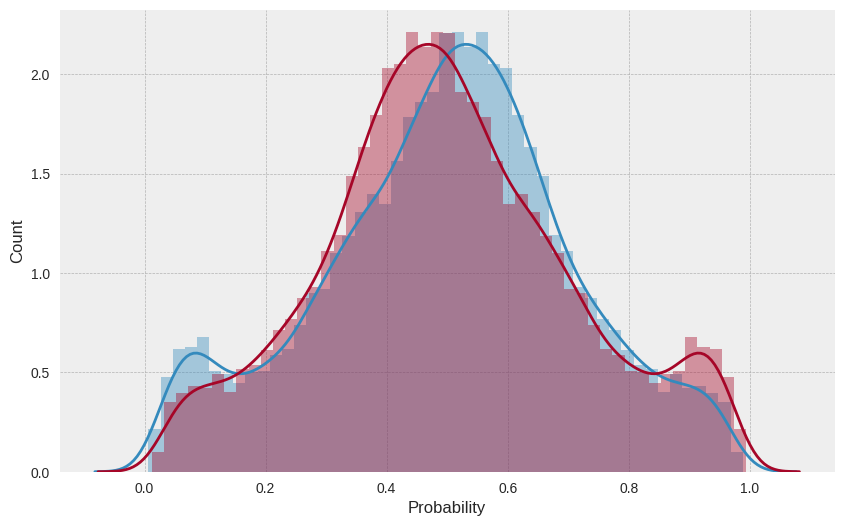

In [152]:
y_proba = xgb.predict_proba(x_test)
sns.distplot(y_proba[:, 1])
sns.distplot(y_proba[:, 0])
plt.xlabel('Probability')
plt.ylabel('Count')

In [80]:
# テスト用データセット：学習+検証用データセット = 20　： 80 に分割
from sklearn.model_selection import train_test_split
x_train_val, x_test, t_train_val, t_test = train_test_split(x, t, test_size=0.2, random_state=1)

# 検証用データセット：学習用データセット ＝ 30 ： 70 に分割
x_train, x_val, t_train, t_val = train_test_split(x_train_val, t_train_val, test_size=0.3, random_state=1)

# ランダムサーチ
from sklearn.model_selection import RandomizedSearchCV
estimator = XGBClassifier(random_state=0)
# ハイパーパラメータの探索範囲（param_distributions）
param_distributions ={'n_estimators':list(range(5, 100, 2)),
                      'subsample':list(range(2, 50, 1)),
                      }

# 探索回数の設定（n_iter）
n_iter = 50
cv = 5
# random_stateの設定
random_state=0
# モデルの定義
random_model = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=param_distributions,
    n_iter=n_iter,
    cv=cv,
    random_state=random_state
)

In [153]:
from sklearn import metrics
# DataFrame 型から values で数値を取得する
x = x_under.values
t = t_under.values
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
# モデルの宣言
model = LogisticRegression(random_state=0)
# モデルの学習
model.fit(x_train, t_train)
# モデルの検証
print(model.score(x_train, t_train))
# 推論
y_pred = model.predict(x_test)
# AccuracyとRecallの確認
print('accuracy : ', metrics.accuracy_score(t_test, y_pred))
print('recall : ', metrics.recall_score(t_test, y_pred, average=None))
print('f1_score :', metrics.f1_score(t_test, y_pred, average=None))

0.6356926479780738
accuracy :  0.6313250308538091
recall :  [0.66603795 0.59582435]
f1_score : [0.64624825 0.61508727]


In [154]:
from sklearn import metrics
# DataFrame 型から values で数値を取得する
x = x_under.values
t = t_under.values
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestClassifier
# モデルの宣言
model = RandomForestClassifier(random_state=0)
# モデルの学習
model.fit(x_train, t_train)
# モデルの検証
print(model.score(x_train, t_train))
# 推論
y_pred = model.predict(x_test)
# AccuracyとRecallの確認
print('accuracy : ', metrics.accuracy_score(t_test, y_pred))
print('recall : ', metrics.recall_score(t_test, y_pred, average=None))
print('f1_score :', metrics.f1_score(t_test, y_pred, average=None))

1.0
accuracy :  0.6206664422753282
recall :  [0.61034062 0.6312266 ]
f1_score : [0.61934249 0.62198122]


In [155]:
from sklearn import metrics
# DataFrame 型から values で数値を取得する
x = x_under.values
t = t_under.values
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.svm import SVC
# モデルの宣言
model = SVC(random_state=0)
# モデルの学習
model.fit(x_train, t_train)
# モデルの検証
print(model.score(x_train, t_train))
# 推論
y_pred = model.predict(x_test)
# AccuracyとRecallの確認
print('accuracy : ', metrics.accuracy_score(t_test, y_pred))
print('recall : ', metrics.recall_score(t_test, y_pred, average=None))
print('f1_score :', metrics.f1_score(t_test, y_pred, average=None))

0.6433860652978795
accuracy :  0.6385055536856278
recall :  [0.61322534 0.66435947]
f1_score : [0.63172934 0.64503691]


In [157]:
from sklearn import metrics
# DataFrame 型から values で数値を取得する
x = x_under.values
t = t_under.values
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

from xgboost import XGBClassifier
# モデルの宣言
xgb = XGBClassifier(random_state=0, n_estimators=80,learning_rate=0.3, booster='gbtree',max_depth=6,
                    min_child_weight=10, gamma=0.1, scale_pos_weight=1)
# モデルの学習
xgb.fit(x_train, t_train)
# モデルの検証
print(xgb.score(x_train, t_train))
# 推論
y_pred = xgb.predict(x_test)
# AccuracyとRecallの確認
print('accuracy : ', metrics.accuracy_score(t_test, y_pred))
print('recall : ', metrics.recall_score(t_test, y_pred, average=None))
print('f1_score :', metrics.f1_score(t_test, y_pred, average=None))

0.7062316680290427
accuracy :  0.6449007068327163
recall :  [0.61899479 0.67139453]
f1_score : [0.63803751 0.65150848]


In [188]:
# テストデータの読み込み
test_df = pd.read_csv('/content/test.csv')
test_df.head()
# loan_status を数値に変換


test_df['term'] = test_df['term'].str.replace('years', '')
test_df['term'] = test_df['term'].str.replace('year', '')
test_df['employment_length'] = test_df['employment_length'].str.replace('years', '')
test_df['employment_length'] = test_df['employment_length'].str.replace('year', '')
test_df.head()



# dfのgrade列をcharged_off_ratesに基づいて数値に変換
test_df['grade'] = df['grade'].map(charged_off_rates1)
test_df.head()

# purpose 列を数値化
test_df['purpose'] = df['purpose'].map(charged_off_rates2)
test_df.head()
# application_type を数値に変換
test_df['application_type'] = test_df['application_type'].map({'Individual': 1, 'Joint App': 0})
test_df.head()

,id,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,242150,1161.830205,3,13.105362,0.036903,10,0.186777,682.016083,1
1,242151,2257.465815,5,14.196200,0.112180,10,0.141207,668.240313,1
2,242152,2182.137002,3,8.307772,0.163397,10,0.186777,703.277694,1
3,242153,520.284912,3,6.956504,0.154649,7,0.141207,731.138779,1
4,242154,2303.349549,3,11.658497,0.538318,6,0.186777,698.368991,1


In [189]:
x_test = test_df.drop(['id'], axis=1).values

In [191]:
y = xgb.predict(x_test)
zero_count = (y == 0).sum()

# 結果を表示
print(f"y列の0の数: {zero_count}")
result_df = pd.DataFrame({
    'id': test_df['id'],  # 1列目: test_dfのid列
    'prediction': y       # 2列目: 予測値y
})
result_df = result_df.astype(int)
result_df.head()

y列の0の数: 14715


,id,prediction
0,242150,0
1,242151,1
2,242152,0
3,242153,0
4,242154,1


In [192]:
# 列名なしでCSVに保存
result_df.to_csv('submit3.csv', index=False, header=False)